HOW TO USE:

Must run the first section to import data and necessary libraries. Then can run subsequent sections to show various data and charts.

In [155]:
'''
Run this section to import libraries and load calibration data from the filepath below
'''
import matplotlib.pyplot as plt
import pandas
import math

df = pandas.read_csv('../data/QuickStrip-HTS-96-CalibrationHistory.csv', skipinitialspace=True)
sorted_df = df.groupby('Date').last().reset_index() #make sorted data frame of last calibration for the day
value_cols = df.columns.tolist()[2:] #list of cols but remove date and time

UpperLeft X (mm)         2.098
UpperRight X (mm)        1.224
LowerLeft X (mm)         1.798
LowerRight X (mm)        1.747
BarcodeReader X (mm)     0.000
RackPickup X (mm)        4.934
RackPlace X (mm)         4.752
RackTrayOffset X (mm)    1.200
dtype: float64


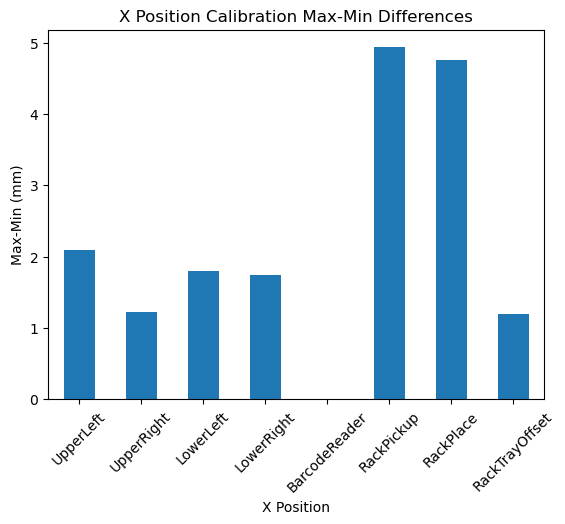

UpperLeft Z (mm)         3.598
UpperRight Z (mm)        4.580
LowerLeft Z (mm)         4.591
LowerRight Z (mm)        4.537
BarcodeReader Z (mm)     0.000
RackPickup Z (mm)        5.729
RackPlace Z (mm)         2.508
RackTrayOffset Z (mm)    0.000
dtype: float64


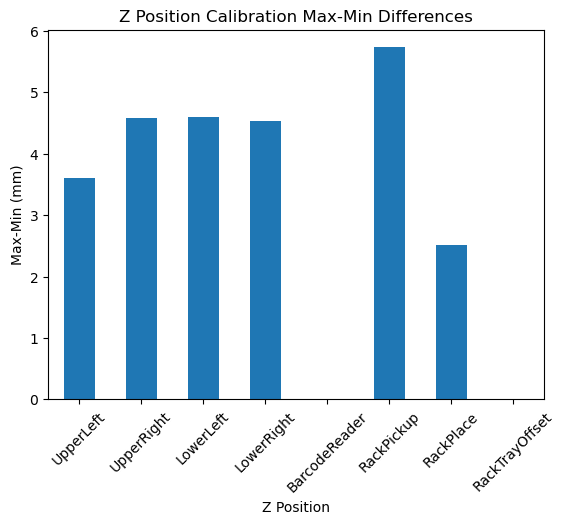

UpperLeft Orientation (deg)         2.099
UpperRight Orientation (deg)        1.712
LowerLeft Orientation (deg)         1.595
LowerRight Orientation (deg)        1.718
BarcodeReader Orientation (deg)     0.000
RackPickup Orientation (deg)        1.314
RackPlace Orientation (deg)         0.558
RackTrayOffset Orientation (deg)    0.000
dtype: float64


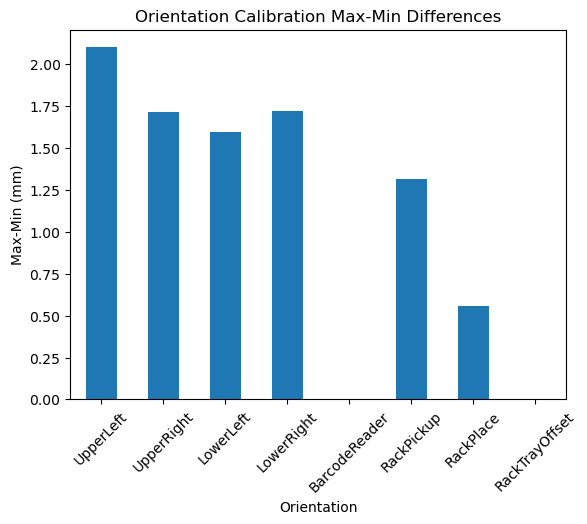

In [163]:
'''
Run this section to plot/show the differences between max and min calibration values for X/Z/Orientation
'''
difference_series = df[value_cols].max() - df[value_cols].min()
labels = ['X Position', 'Z Position', 'Orientation']
for i in range(3):
    axis_differences = difference_series[i::3]
    print(axis_differences)
    renamed_series = axis_differences.rename(index=lambda name: name.split(' ')[0])
    renamed_series.plot(kind='bar', 
                        title=f'{labels[i]} Calibration Max-Min Differences', 
                        xlabel=f'{labels[i]}', 
                        ylabel='Max-Min (mm)')
    plt.xticks(rotation=45) 
    plt.show()

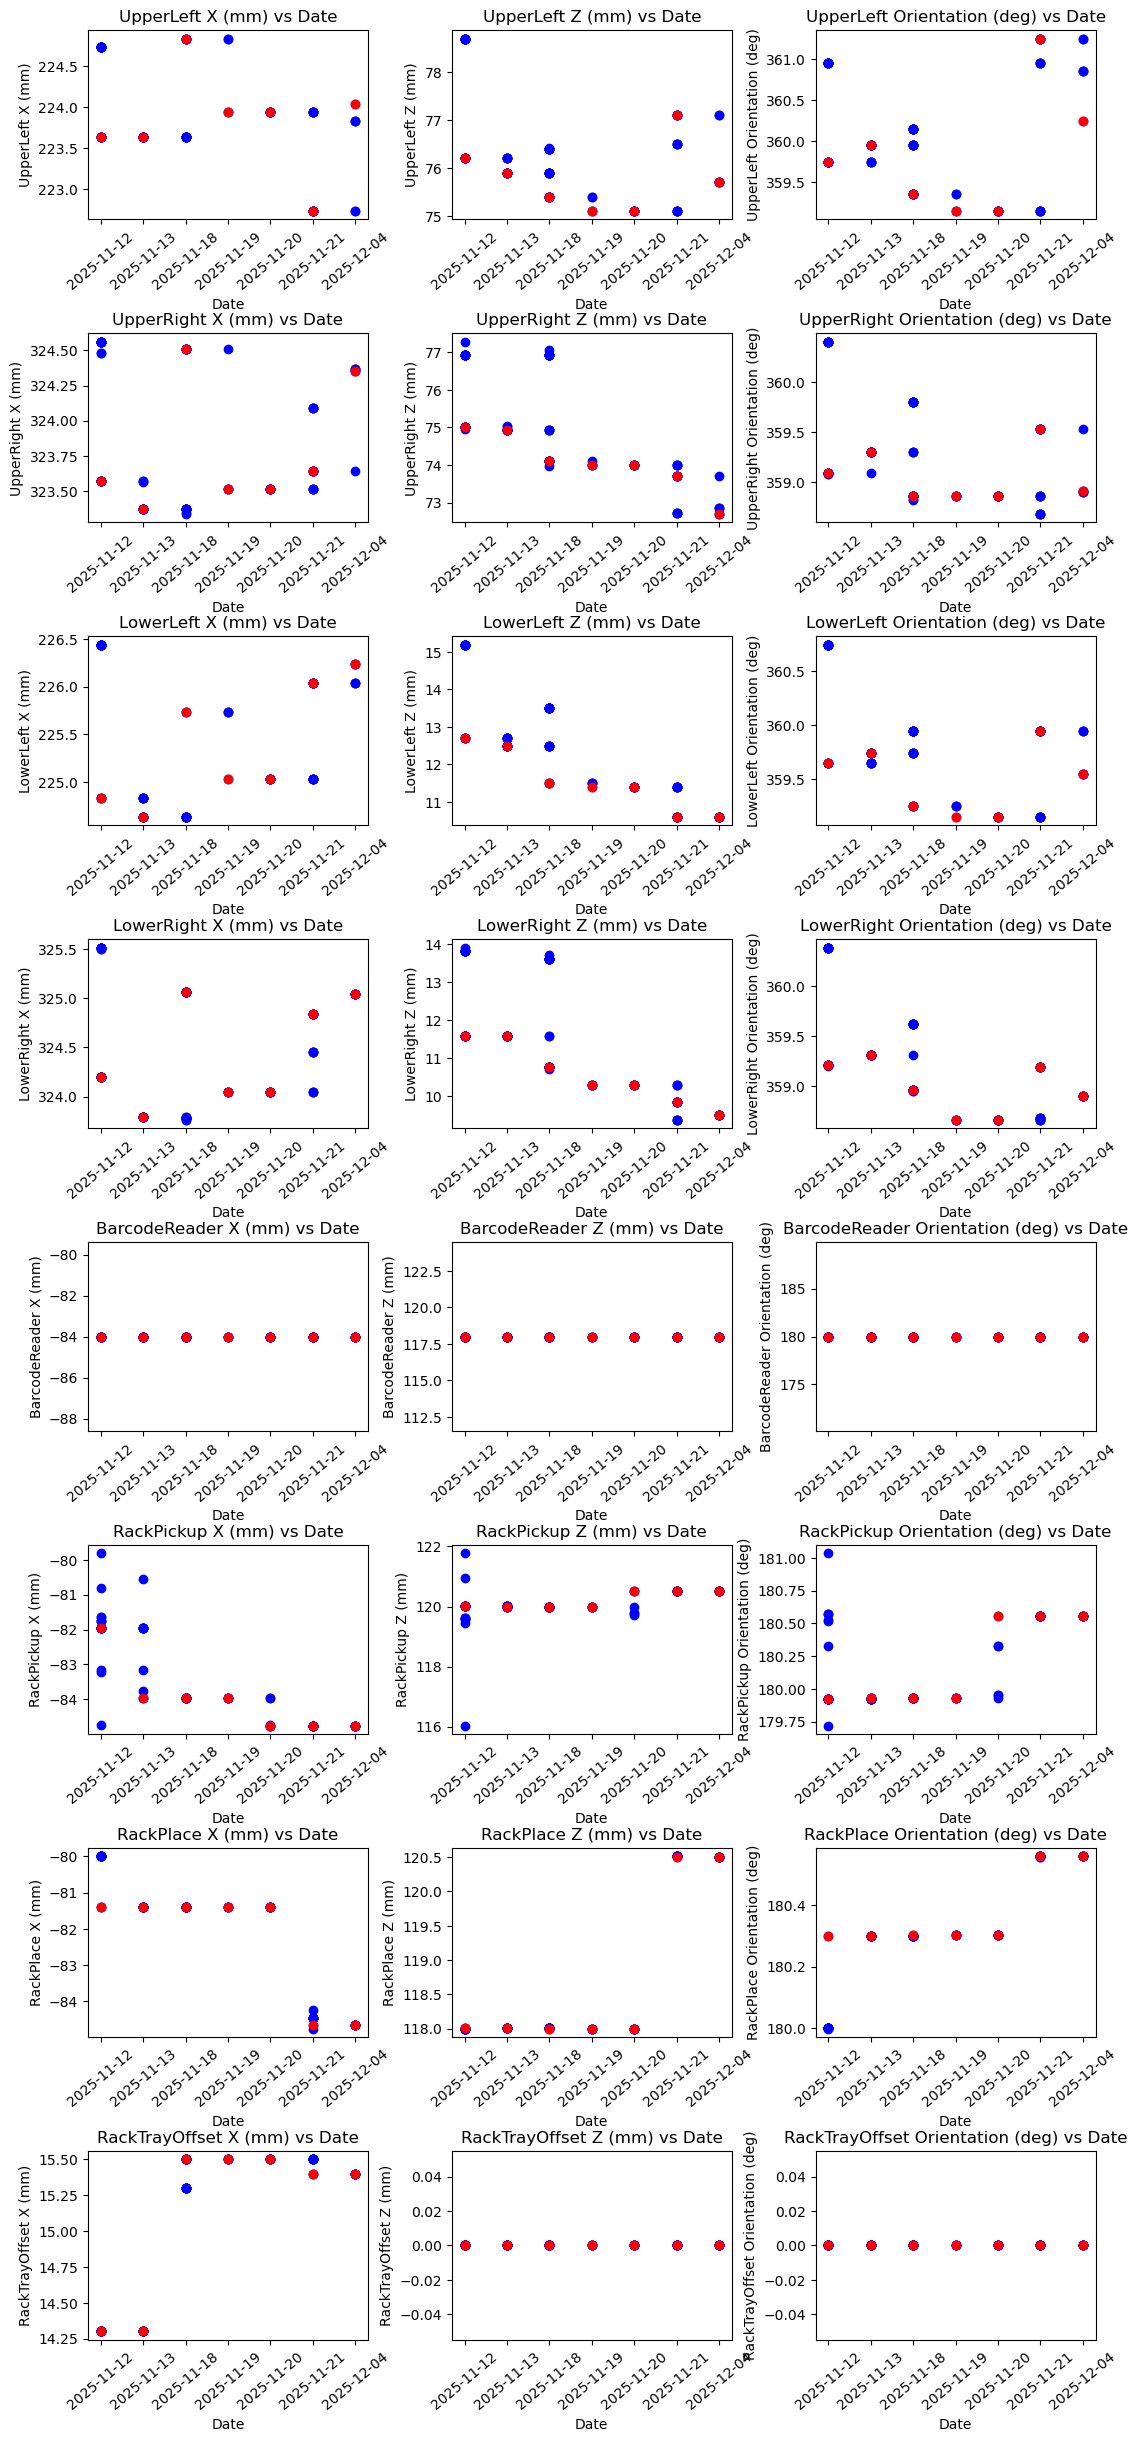

In [157]:
'''
Run this section to plot all the calibration positions per date. 
You can turn on and off what to plot by setting the following statements true/false
Blue represents all the calibrations saved for the day and red represents the last save of the day.
'''
plot_all_calibrations_per_day = True
plot_last_calibration_per_day = True

subplot_rows = int((df.shape[1] - 2) / 3)
subplot_cols = 3
fig, ax = plt.subplots(subplot_rows, subplot_cols, figsize=(13, 30))
plt.subplots_adjust(wspace=.3)
plt.subplots_adjust(hspace=.6)

for i in range(len(value_cols)):
    x_idx = math.floor(i / subplot_cols)
    y_idx = i % subplot_cols
    
    x = df['Date']
    y = df[df_modified.columns[i]]
    last_x = sorted_df['Date']
    last_y = sorted_df[df_modified.columns[i]]
    if plot_all_calibrations_per_day:
        ax[x_idx,y_idx].scatter(x, y, color='blue')
    if plot_last_calibration_per_day:
        ax[x_idx,y_idx].scatter(last_x, last_y, color='red')
    ax[x_idx,y_idx].set_title(f"{y.name} vs {x.name}")
    ax[x_idx,y_idx].set_xlabel(x.name)
    ax[x_idx,y_idx].set_ylabel(y.name)
    ax[x_idx,y_idx].tick_params('x', labelrotation=40)
    
plt.show()